In [1]:
#Cargamos las librerias iniciales que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
#Vamos a hacer algunos analisis de los Dataset de zona norte y zona sur por separado comparando los resultados luego de 
#someterlos a los mismos analisis
#Cargamos el Dataset de zona norte 
dfn=pd.read_excel("Datos_totales.xlsx")
dfn.head(20)


,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion,Unnamed: 0
0,101,210,35,35,56,1600,2021,257.7,NaN
1,101,462,50,50,70,1400,1988,199.6,NaN
2,101,462,50,50,40,800,1989,180.5,NaN
3,101,469,150,130,190,1462,1988,199.6,NaN
4,101,469,120,120,168,1400,1989,180.5,NaN
5,101,686,200,200,300,1500,1988,199.6,NaN
6,101,686,100,100,80,800,1989,180.5,NaN
7,101,686,300,300,480,1600,1995,197.1,NaN
8,101,686,200,200,360,1800,1996,393.5,NaN
9,101,686,200,200,400,2000,1997,283.5,NaN


In [3]:
#hacemos una busqueda de asimetrias de las variables mediante el metodo skew
skew=dfn.skew().abs().sort_values()
skew

Unnamed: 0        0.004058
Cultivo           0.068802
idDepartamento    0.072094
anio              0.153797
Precipitacion     1.123397
Rendimiento       1.491557
Producción        2.699950
Sup_Sembrada      2.839910
Sup_Cosechada     2.877418
dtype: float64

In [16]:
dfn = dfn.drop("Unnamed: 0", axis=1)
dfn

,Cultivo,idDepartamento,Sup_Cosechada,Rendimiento,anio,Precipitacion
0,101,210,35,1600,2021,257.7
1,101,462,50,1400,1988,199.6
2,101,462,50,800,1989,180.5
3,101,469,130,1462,1988,199.6
4,101,469,120,1400,1989,180.5
...,...,...,...,...,...,...
3379,129,833,105070,4900,2017,419.1
3380,129,833,80875,4197,2018,440.8
3381,129,833,119000,3303,2019,395.4
3382,129,833,131000,4351,2020,503.3


In [52]:
#dfn = dfn.drop("Sup_Sembrada", axis=1)
dfn

,Cultivo,idDepartamento,Sup_Cosechada,Rendimiento,anio,Precipitacion
0,101,210,35,1600,2021,257.7
1,101,462,50,1400,1988,199.6
2,101,462,50,800,1989,180.5
3,101,469,130,1462,1988,199.6
4,101,469,120,1400,1989,180.5
...,...,...,...,...,...,...
3379,129,833,105070,4900,2017,419.1
3380,129,833,80875,4197,2018,440.8
3381,129,833,119000,3303,2019,395.4
3382,129,833,131000,4351,2020,503.3


In [17]:
skew=dfn.skew().abs().sort_values()
skew

Cultivo           0.068802
idDepartamento    0.072094
anio              0.153797
Precipitacion     1.123397
Rendimiento       1.491557
Sup_Cosechada     2.877418
dtype: float64

C:\Users\syluv\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sup_Sembrada', ylabel='Density'>

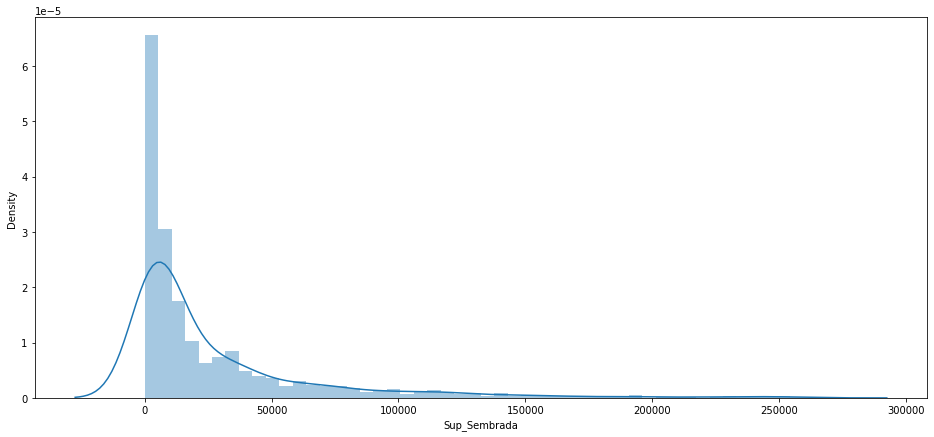

In [6]:
#Intentamos ver la distrubucion de algunas columnas
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(dfn.iloc[:,4])

In [20]:
X = dfn.drop("Rendimiento", axis=1)
y=dfn.Rendimiento


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
model=DecisionTreeRegressor(random_state=1)

In [25]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [26]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [27]:
y_preds=model.predict(X_test)

In [28]:
comp=pd.DataFrame({"real": y_test, "preds":y_preds})

In [16]:
comp.head(30)

,real,preds
48,947,1000.0
1406,479,408.0
1800,2409,2394.0
943,4000,3000.0
309,2000,2100.0
634,4300,3700.0
385,2300,2842.0
863,2000,1900.0
1427,1324,1000.0
1773,2220,2470.0


In [29]:
from sklearn.metrics import accuracy_score


In [30]:
acc= accuracy_score(y_test, y_preds)
acc

0.11318897637795275

In [55]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test,y_preds, squared = False)
rmse

754.0654309889816

In [60]:
from sklearn.metrics import r2_score
r2= r2_score(y_test,y_preds)
r2

0.8369434169953391

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
import warnings
warnings.filterwarnings('once')

Valor óptimo de n_estimators: 146


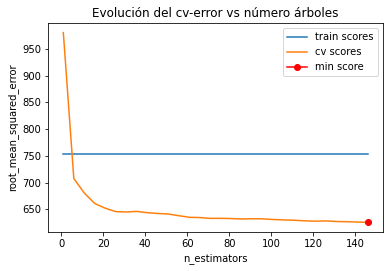

In [33]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 1.0,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(y_test,y_preds, squared = False)
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

In [34]:
model2 = RandomForestRegressor(
            n_estimators = 146,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 1.0,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
model2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=146, n_jobs=-1, random_state=123)

In [35]:
y_preds2=model2.predict(X_test)


In [36]:
comp2=pd.DataFrame({"real": y_test, "preds":y_preds2})
comp2

,real,preds
569,2800,2629.452055
3340,3584,3991.157534
1850,2100,2371.479452
1412,4200,3847.623288
2202,1851,1743.130137
...,...,...
2347,1200,1698.178082
1588,1000,889.529680
2521,4500,5603.041096
154,3100,2521.232877


In [37]:
rmse = mean_squared_error(y_test,y_preds2, squared = False)
rmse

529.6167043554652

In [61]:
from sklearn.metrics import r2_score
r2= r2_score(y_test,y_preds2)
r2

0.9195652673330523

Valor óptimo de max_features: 3


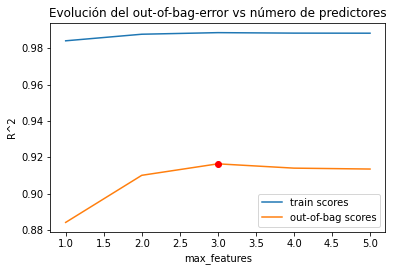

In [38]:
#Intentamos ver el valor optimo de features para mejorar nuestro modelo
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 146,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

In [64]:
#Aplicamos los cambios
model3 = RandomForestRegressor(
            n_estimators = 146,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 0.6,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
model3.fit(X_train, y_train)

RandomForestRegressor(max_features=0.6, n_estimators=146, n_jobs=-1,
                      random_state=123)

In [65]:
y_preds3=model3.predict(X_test)

In [66]:
rmse = mean_squared_error(y_test,y_preds3, squared = False)
rmse

515.8685774160534

In [67]:
from sklearn.metrics import r2_score
r2= r2_score(y_test,y_preds3)
r2

0.9236870181283181

Valor óptimo de max_features: 1


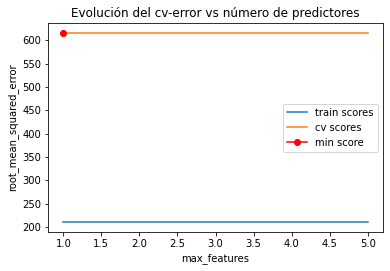

In [63]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 146,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 0.6,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

In [68]:
#Grid Search basado en out-of-bag error
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [146],
                 'max_features': [3],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    modelo = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_r2'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

Modelo: {'max_depth': None, 'max_features': 3, 'n_estimators': 146} ✓
Modelo: {'max_depth': 3, 'max_features': 3, 'n_estimators': 146} ✓
Modelo: {'max_depth': 10, 'max_features': 3, 'n_estimators': 146} ✓
Modelo: {'max_depth': 20, 'max_features': 3, 'n_estimators': 146} ✓


,oob_r2,max_depth,max_features,n_estimators
0,0.916711,NaN,3.0,146.0
3,0.916476,20.0,3.0,146.0
2,0.899304,10.0,3.0,146.0
1,0.603250,3.0,3.0,146.0


In [44]:
#Grid Search basado en validación cruzada
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [50,100,150],
              'max_features': [3, 4, 5],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
29,20,3,150,-595.502039,59.823407,-224.353946,6.774641
2,None,3,150,-595.579456,59.765482,-224.657194,6.302385
28,20,3,100,-596.969666,59.303090,-226.301334,7.015703
5,None,4,150,-596.973513,62.318570,-225.159038,6.790740
1,None,3,100,-597.168010,59.214981,-226.706662,7.255684
32,20,4,150,-598.364959,61.960058,-225.054735,6.966553
4,None,4,100,-599.241288,63.407100,-226.867046,7.430809
27,20,3,50,-600.249176,56.363572,-232.721678,7.647063
31,20,4,100,-600.253073,62.512912,-226.968028,7.437142
0,None,3,50,-603.999327,59.056173,-233.008069,7.888536


In [45]:
modelo_final = grid.best_estimator_
predicciones = modelo.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 513.3040551864112


In [46]:
comp3=pd.DataFrame({"real": y_test, "preds":y_preds})
comp3.sample(50)

,real,preds
1846,2300,2300.0
1561,700,700.0
1900,2804,2397.0
2781,1100,1100.0
2934,1999,3000.0
3097,1898,2400.0
1403,4000,4500.0
2084,4200,3700.0
3257,2845,2409.0
2395,7000,4500.0


Ahora probamos el SVR


In [48]:
#Probamos con un escalado y normalizado de los datos a ver como se comportan
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
#Entrenamos y probamos el SVM
from sklearn import svm
svm_reg= svm.SVR()
regressor=svm_reg.fit(X_train, y_train)
y_pred=regressor.predict(X_test)


In [50]:
comp4=pd.DataFrame({"real": y_test, "preds":y_preds})
comp4.sample(10)

,real,preds
2284,1100,2000.0
2709,1478,1795.0
2398,3196,2504.0
560,3000,2800.0
2476,2500,2100.0
2085,3800,3600.0
571,2700,2800.0
3109,3300,3300.0
2844,1300,400.0
486,2000,1947.0


In [51]:
#Calculamos las metricas de error
from sklearn import metrics
print("mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:", metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


mean Absolute Error: 1283.8265085704818
mean squared error: 3492999.9311323706
root mean squared error: 1868.9569099185703
